In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [7]:
df1=df.copy()

In [8]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
# there are no missing values

In [13]:
df1.duplicated().sum()

3008

In [15]:
df1.drop_duplicates(inplace=True)

In [16]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [17]:
#duplicates are removed

In [18]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [23]:
numeric_data=df1.select_dtypes(include=[np.number])
categorical_data=df1.select_dtypes(exclude=[np.number])

In [25]:
categorical_data['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [26]:
#these categorical data has 2 important factors whcih cant 

In [30]:
df2=pd.get_dummies(df1,columns=['Department','salary'],dtype = int)

In [31]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [32]:
df2.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005382,-0.002552,...,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,0.017031,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.002885,-0.005448,...,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,-0.017543,0.010416,-0.000755
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.001464,0.010077,...,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.002820,-0.000914,0.002484
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.001007,0.004159,...,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.002499,-0.000675,0.002065
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.003233,-0.008380,...,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,0.029111,-0.032541,0.016612
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.009777,0.011793,...,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.002735,0.001580,-0.003108
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.003324,-0.029016,...,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,-0.094769,0.099113,-0.047214
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.034334,0.025610,...,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,0.063982,-0.076576,0.041601
Department_IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,1.000000,-0.073779,...,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826,-0.010617,0.005370,0.000482
Department_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,-0.073779,1.000000,...,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.013363,-0.007301,0.014761


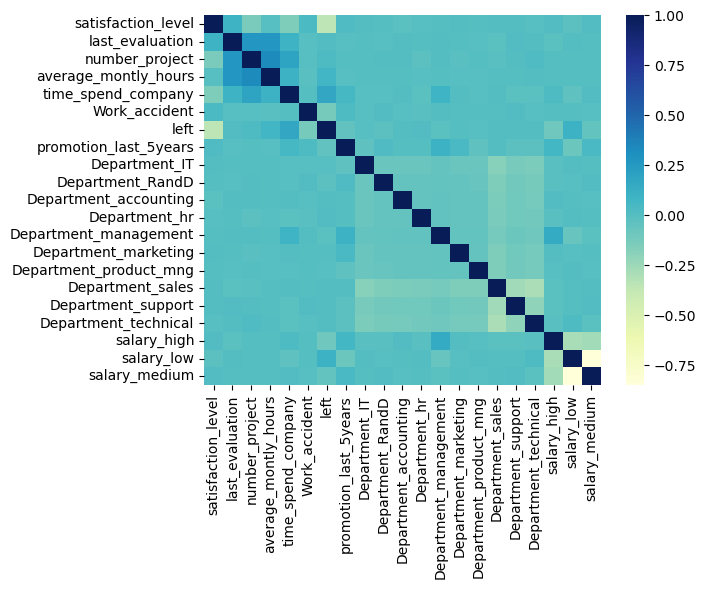

In [33]:
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu")
plt.show()

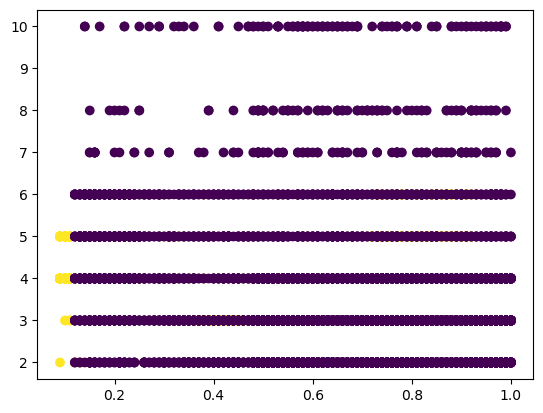

In [34]:
plt.scatter(df2['satisfaction_level'], df2['time_spend_company'], c =df2['left'])

<Axes: xlabel='left', ylabel='satisfaction_level'>

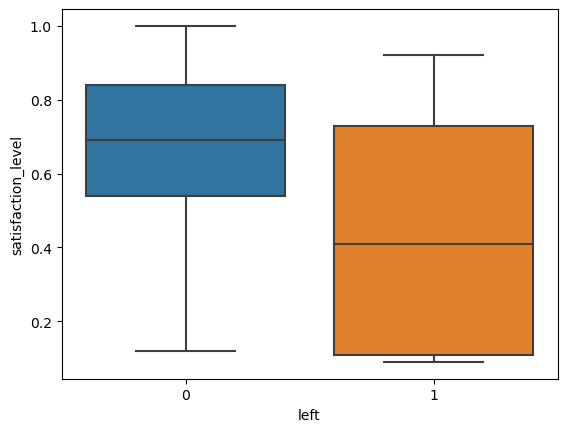

In [42]:
sns.boxplot(data=df2,y=df2['satisfaction_level'],x=df2['left'])

In [43]:
X=df2.drop(columns=['left'])
y=df2['left']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
clf1 = LogisticRegression()
clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)

print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Logistic Regression Confusion Matrix\n")
confusion_matrix(y_test,y_pred1)

Accuracy of Logistic Regression 0.834931221342226
Logistic Regression Confusion Matrix



C:\Users\mrchi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1925,   75],
       [ 321,   78]], dtype=int64)